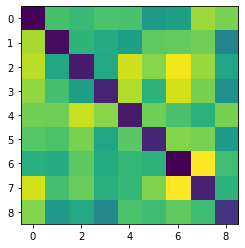

In [101]:
import sklearn
import sklearn.model_selection
import sklearn.datasets
import sklearn.decomposition

import joblib

from numpy.linalg import norm

import numpy as np

import sklearn.utils
from sklearn.utils.metaestimators import _safe_split

from collections import defaultdict


X, y = sklearn.datasets.load_digits(return_X_y=True)

def reconstruction_error(estimator, X, y=None):
    return norm(X - estimator.inverse_transform(estimator.transform(X))) / len(X)

estimator = sklearn.decomposition.PCA()

def group_from_y(X, y):
    return y

def group_from_function(X, y, f):
    return f(X, y)

def split(X, y, groups=None):
    
    Xs = defaultdict(list)
    ys = defaultdict(list)
    
    for i in range(len(X)):
        Xs[groups[i]].append(X[i])
        ys[groups[i]].append(y[i])
        
    return [np.array(Xi) for Xi in Xs.values()], [np.array(yi) for yi in ys.values()]
    
Xs, ys = split(X, group_from_y(y))

d = 8



estimators = [sklearn.decomposition.PCA(d).fit(Xi) for Xi in Xs]

import matplotlib.pyplot as plt

plt.imshow(np.array([[reconstruction_error(estimators[i], Xs[j]) for i in range(9)] for j in range(9)]))
